## 加载IMDB数据集

In [21]:
import tensorflow as tf
import keras
from keras.datasets import imdb

In [22]:
(train_data, train_labels), (test_data,
                             test_labels) = imdb.load_data(num_words=10000)

In [23]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [24]:
train_labels[0]

1

In [25]:
max([max(sequence) for sequence in train_data])

9999

In [26]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

- reverse_word_index 键值颠倒，将整数索引映射为单词
- decoded_review 将评论解码。索引减去了3，因为0,1,2是为"padding"(填充)、"start of sequence"(序列开始)、"unkown"(未知词)分别保留的索引

In [40]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 准备数据

In [28]:
import numpy as np

In [33]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [34]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

- 训练和测试数据向量化

In [36]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [37]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

- 标签向量化

## 构建网络

#### 模型定义

In [41]:
from keras import models
from keras import layers

In [42]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#### 编译模型

In [44]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

#### 配置优化器(未运行)

In [ ]:
from keras import optimizers

In [ ]:
model.compile(optimizer = optimizer.RMSprop(lr=0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

#### 使用自定义的损失和指标(未运行)

In [ ]:
from keras import losses
from keras import metrics

In [ ]:
model.compile(optimizer = optimizer.RMSprop(lr=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binaryaccuracy()])

## 验证你的方法

#### 留出验证集

In [45]:
x_val = x_train[:10000]
partial_x_train=x_train[10000:]

In [49]:
y_val = y_train[:10000]
partial_y_train=y_train[10000:]

- 现在使用512个样本组成的小批量，将模型训练20个轮次(即20次迭代)
- 同时还要监控在留出的10000个样本上的损失和精度

#### 训练模型

In [47]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [51]:
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 10s 658us/step - loss: 0.5344 - acc: 0.7746 - val_loss: 0.3943 - val_acc: 0.8687
Epoch 2/20
15000/15000 [==============================] - 5s 307us/step - loss: 0.3181 - acc: 0.8973 - val_loss: 0.3277 - val_acc: 0.8713
Epoch 3/20
15000/15000 [==============================] - 4s 281us/step - loss: 0.2343 - acc: 0.9245 - val_loss: 0.2862 - val_acc: 0.8881
Epoch 4/20
15000/15000 [==============================] - 4s 278us/step - loss: 0.1844 - acc: 0.9400 - val_loss: 0.2745 - val_acc: 0.8905
Epoch 5/20
15000/15000 [==============================] - 4s 279us/step - loss: 0.1526 - acc: 0.9509 - val_loss: 0.2996 - val_acc: 0.8806
Epoch 6/20
15000/15000 [==============================] - 4s 279us/step - loss: 0.1225 - acc: 0.9625 - val_loss: 0.2882 - val_acc: 0.8865
Epoch 7/20
15000/15000 [==============================] - 4s 279us/step - loss: 0.1070 - acc: 0.9658 - val_loss: 0.3037 -

In [52]:
history_dict = history.history

In [53]:
history_dict.keys()

dict_keys(['acc', 'val_loss', 'loss', 'val_acc'])

- 调用model.fit()返回了一个History对象
- 这个对象有一个成员history，它是一个字典，包含训练过程中的所有数据

#### 绘制训练损失和验证损失

In [55]:
import matplotlib.pyplot as plt

In [56]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

In [57]:
epochs = range(1, len(loss_values) + 1)

In [58]:
plt.plot(epochs, loss_values, 'bo', label = 'Training loss_values')#'bo'表示蓝色圆点
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')#'b'表示蓝色实线
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

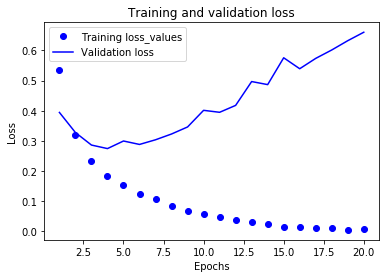

In [59]:
plt.show()

#### 绘制训练精度和验证精度

In [61]:
plt.clf()#清空图像

In [62]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

In [63]:
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

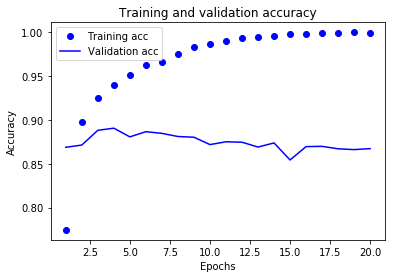

In [64]:
plt.show()

- 验证损失与验证精度似乎在第四轮达到最佳值
- **过拟合**：模型在训练数据上的表现越来越好，但在前所未见的数据上不一定表现得越来越好
- 即无法泛化到训练集之外的数据

#### 从头开始重新训练一个模型(训练四轮)

In [65]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [66]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [67]:
model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 8s 315us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 5s 193us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 5s 190us/step - loss: 0.1982 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 15s 598us/step


In [68]:
results

[0.32315461939811707, 0.87348000000000003]

## 使用训练好的网络在新数据上生成预测结果

In [69]:
model.predict(x_test)

array([[ 0.14026147],
       [ 0.99970287],
       [ 0.29552513],
       ..., 
       [ 0.07234977],
       [ 0.04342839],
       [ 0.48153403]], dtype=float32)